In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

In [3]:
df = pd.read_csv('E:\\Datasets\\NFLX.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3119 non-null   datetime64[ns]
 1   Open       3119 non-null   float64       
 2   High       3119 non-null   float64       
 3   Low        3119 non-null   float64       
 4   Close      3119 non-null   float64       
 5   Adj Close  3119 non-null   float64       
 6   Volume     3119 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 170.7 KB


In [5]:
df.shape

(3119, 7)

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3119,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3.119000e+03
mean,2016-03-13 13:34:52.593780224,185.774606,188.574990,182.773507,185.747629,185.747629,1.879939e+07
min,2010-01-04 00:00:00,6.960000,7.178571,6.931429,7.018571,7.018571,1.144000e+06
25%,2013-02-07 12:00:00,33.255714,33.815000,32.611429,33.328571,33.328571,6.233250e+06
50%,2016-03-15 00:00:00,100.209999,102.110001,98.529999,100.230003,100.230003,1.232560e+07
75%,2019-04-20 00:00:00,336.800003,342.384995,331.125000,337.539993,337.539993,2.342225e+07
max,2022-05-23 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,3.155418e+08
std,NaN,182.675775,185.222112,179.874082,182.575796,182.575796,2.091301e+07


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


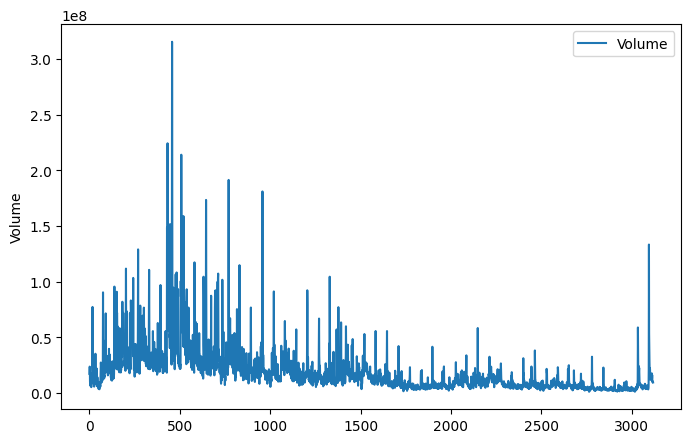

In [8]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df.index, y=df['Volume'], label='Volume')
plt.show()

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


In [11]:
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


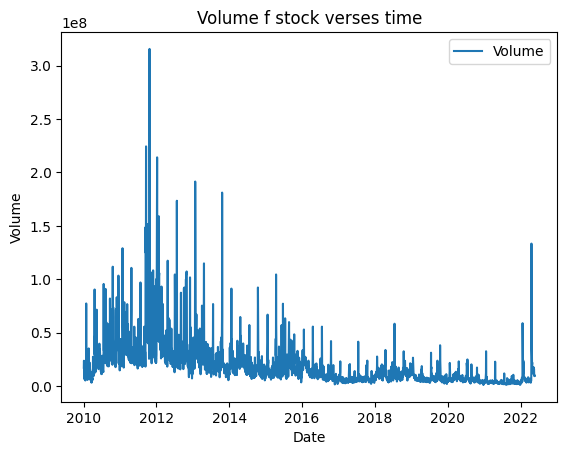

In [12]:
sns.lineplot(x=df.index, y=df['Volume'], label='Volume')
plt.title('Volume f stock verses time')
plt.show()

<Axes: title={'center': 'Netflix Stock Price'}, xlabel='Date'>

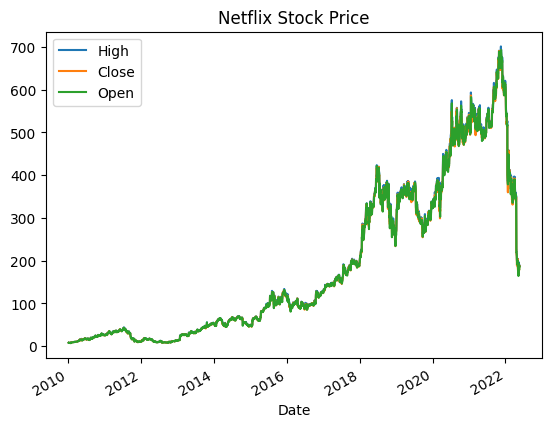

In [13]:
df.plot(y=['High','Close','Open'], title='Netflix Stock Price')

<Axes: xlabel='Year'>

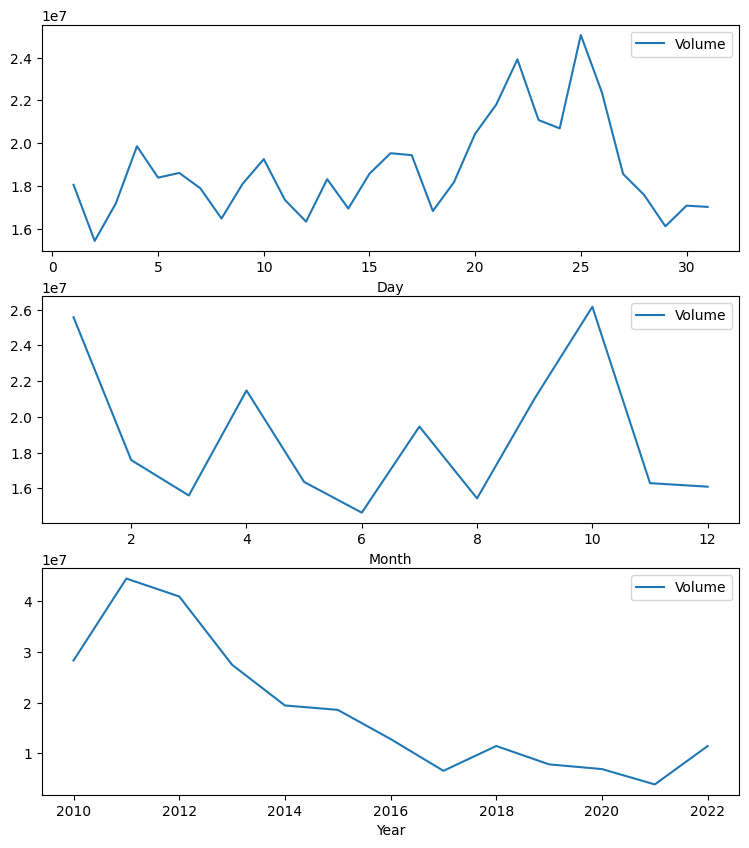

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,10))
df.groupby(df.index.day).mean().plot(y='Volume', ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume', ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume', ax=ax3, xlabel='Year')

In [22]:
# Dates with highest stock price

highest_stocks = df.sort_values(by='High', ascending=False).head(10)
highest_stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-17,690.000000,700.989990,686.090027,691.690002,691.690002,2732800
2021-11-19,692.349976,694.159973,675.000000,678.799988,678.799988,2613700
2021-11-18,691.609985,691.739990,679.739990,682.020020,682.020020,2012900
2021-10-29,673.059998,690.969971,671.239990,690.309998,690.309998,3825300
2021-11-01,689.059998,689.969971,676.539978,681.169983,681.169983,3110900
2021-11-03,677.270020,689.390015,677.270020,688.289978,688.289978,2334900
2021-11-16,678.270020,688.359985,676.900024,687.400024,687.400024,2077400
2021-11-02,683.109985,687.679993,673.820007,677.719971,677.719971,3888600
2021-11-04,685.890015,685.940002,665.500000,668.400024,668.400024,4865000


In [24]:
#  Top dates having lowest stock price

lowest_stock = df.sort_values(by='Low', ascending=True).head(10)
lowest_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-25,7.292857,7.357143,6.931429,7.018571,7.018571,13791400
2010-01-26,6.960000,7.178571,6.937143,7.135714,7.135714,11343500
2010-01-27,7.142857,7.311429,6.992857,7.281429,7.281429,23347100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-21,7.217143,7.454286,7.214286,7.312857,7.312857,8614900
2010-01-22,7.297143,7.484286,7.214286,7.270000,7.270000,9395400
2010-01-20,7.265714,7.492857,7.221429,7.320000,7.320000,9685200
2010-01-15,7.245714,7.407143,7.232857,7.278571,7.278571,13031200
2010-01-19,7.250000,7.382857,7.242857,7.314286,7.314286,5302500


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

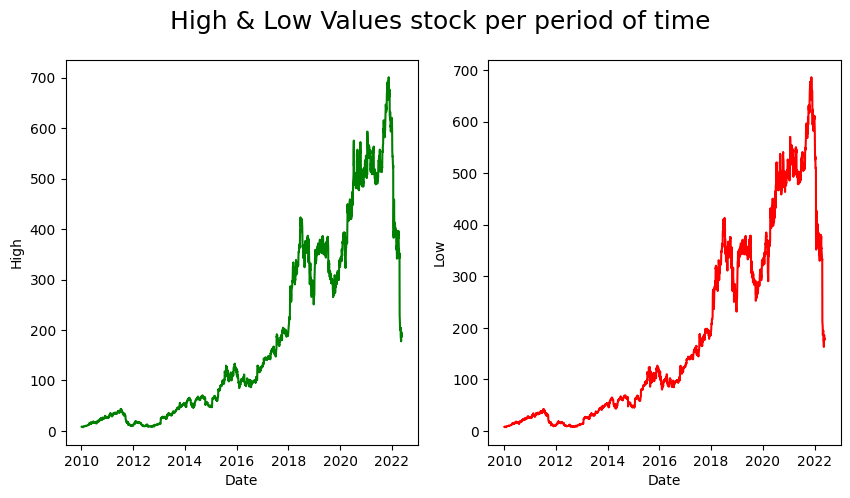

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
fig.suptitle('High & Low Values stock per period of time', fontsize=18)
sns.lineplot(ax=axes[0], y=df['High'], x=df.index, color='green')
sns.lineplot(ax=axes[1], y=df['Low'], x=df.index, color='red')
plt.show()